In [2]:
#data loading
import pandas as pd
filename="/content/aus_outbound.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames     Month                                Country  \
0             1  2005 Jan  China (excl SARs and Taiwan province)   
1             2  2005 Feb  China (excl SARs and Taiwan province)   
2             3  2005 Mar  China (excl SARs and Taiwan province)   
3             4  2005 Apr  China (excl SARs and Taiwan province)   
4             5  2005 May  China (excl SARs and Taiwan province)   
...         ...       ...                                    ...   
11695     11696  2017 Feb                         United Kingdom   
11696     11697  2017 Mar                         United Kingdom   
11697     11698  2017 Apr                         United Kingdom   
11698     11699  2017 May                         United Kingdom   
11699     11700  2017 Jun                         United Kingdom   

                             Purpose  Count  
0                           Business   5748  
1                           Business   4483  
2                           Business   7052  

In [3]:
print(a.head())

   rownames     Month                                Country   Purpose  Count
0         1  2005 Jan  China (excl SARs and Taiwan province)  Business   5748
1         2  2005 Feb  China (excl SARs and Taiwan province)  Business   4483
2         3  2005 Mar  China (excl SARs and Taiwan province)  Business   7052
3         4  2005 Apr  China (excl SARs and Taiwan province)  Business   9836
4         5  2005 May  China (excl SARs and Taiwan province)  Business   6050


In [4]:
print(a.tail())

       rownames     Month         Country                        Purpose  \
11695     11696  2017 Feb  United Kingdom  Visiting Friends or Relatives   
11696     11697  2017 Mar  United Kingdom  Visiting Friends or Relatives   
11697     11698  2017 Apr  United Kingdom  Visiting Friends or Relatives   
11698     11699  2017 May  United Kingdom  Visiting Friends or Relatives   
11699     11700  2017 Jun  United Kingdom  Visiting Friends or Relatives   

       Count  
11695   6261  
11696  12632  
11697  14425  
11698  18753  
11699  22112  


In [5]:
##Checking for null values
a.isna().sum()

,0
rownames,0
Month,0
Country,0
Purpose,0
Count,0


In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="Count"

#transform string into int
transformColumns={0,1,2,3}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)


       rownames  Month  Country  Purpose  Count
0             0      4        0        0   5748
1             1      3        0        0   4483
2             2      7        0        0   7052
3             3      0        0        0   9836
4             4      8        0        0   6050
...         ...    ...      ...      ...    ...
11695     11695    145       12        5   6261
11696     11696    148       12        5  12632
11697     11697    144       12        5  14425
11698     11698    149       12        5  18753
11699     11699    147       12        5  22112

[11700 rows x 5 columns]


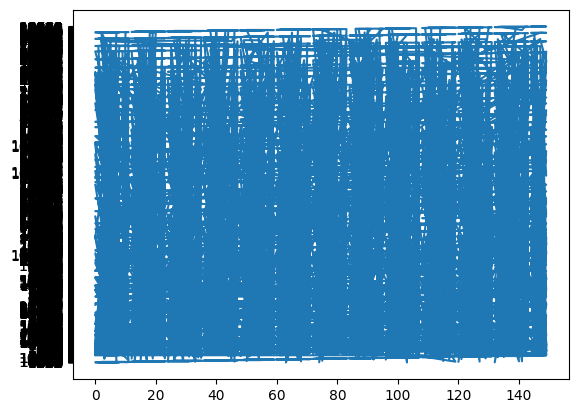

In [8]:
from matplotlib import pyplot as plt

index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 11700 artists>

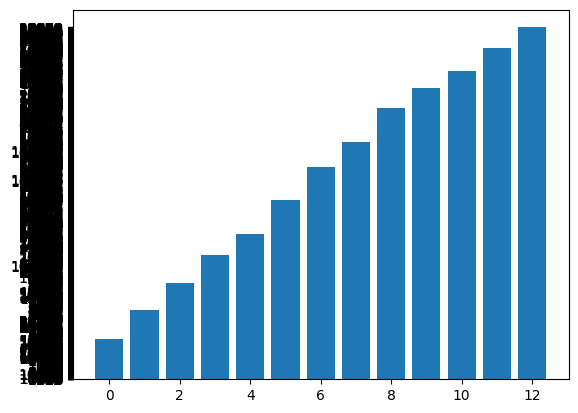

In [9]:
plt.bar(a[a.columns[2]],a[str(target)])

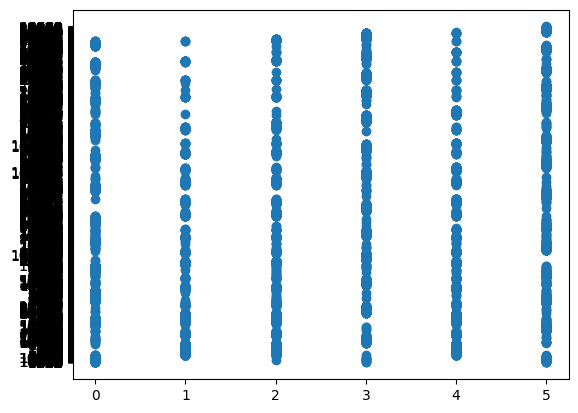

In [11]:
plt.scatter(a[a.columns[3]], a[str(target)])

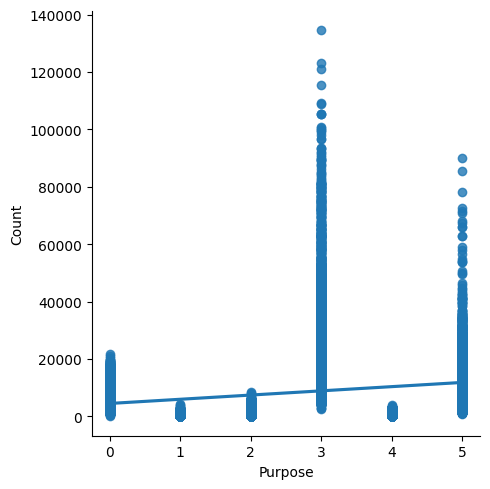

In [18]:
import seaborn as sns
a["Purpose"] = pd.to_numeric(a["Purpose"])
a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="Purpose",y="Count",data=a)

<Axes: xlabel='Country', ylabel='Count'>

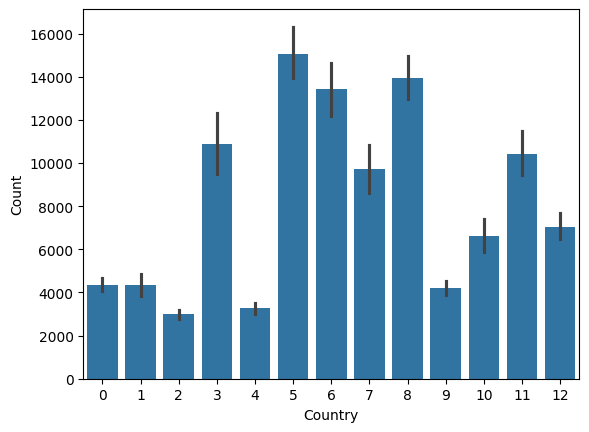

In [19]:
sns.barplot(x=a.columns[2],y=str(target),data=a)

<Axes: xlabel='Purpose', ylabel='Count'>

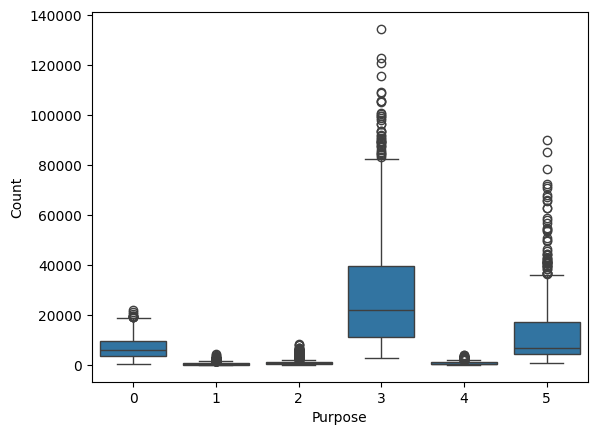

In [20]:
sns.boxplot(x=a.columns[3],y=str(target),data=a)

<ipython-input-21-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='Count', ylabel='Density'>

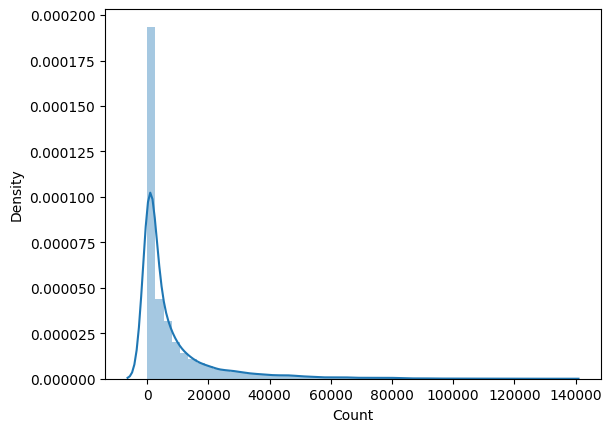

In [21]:
sns.distplot(a[str(target)])

<Axes: xlabel='Month', ylabel='Density'>

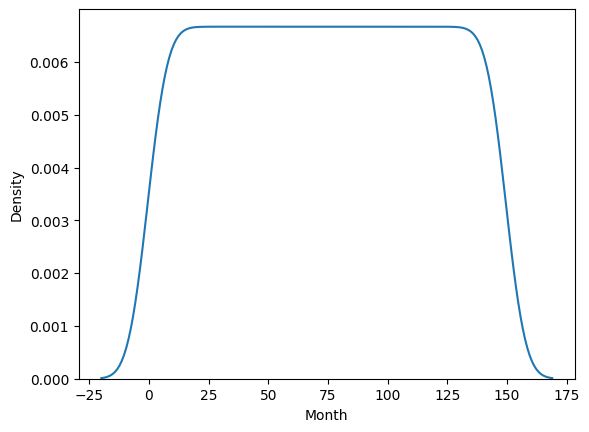

In [22]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='Month', ylabel='count'>

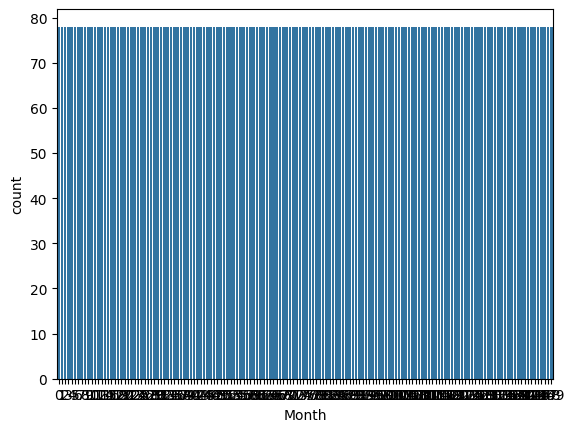

In [ ]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

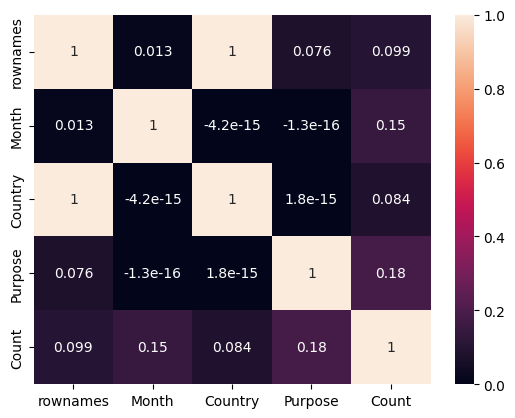

In [24]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

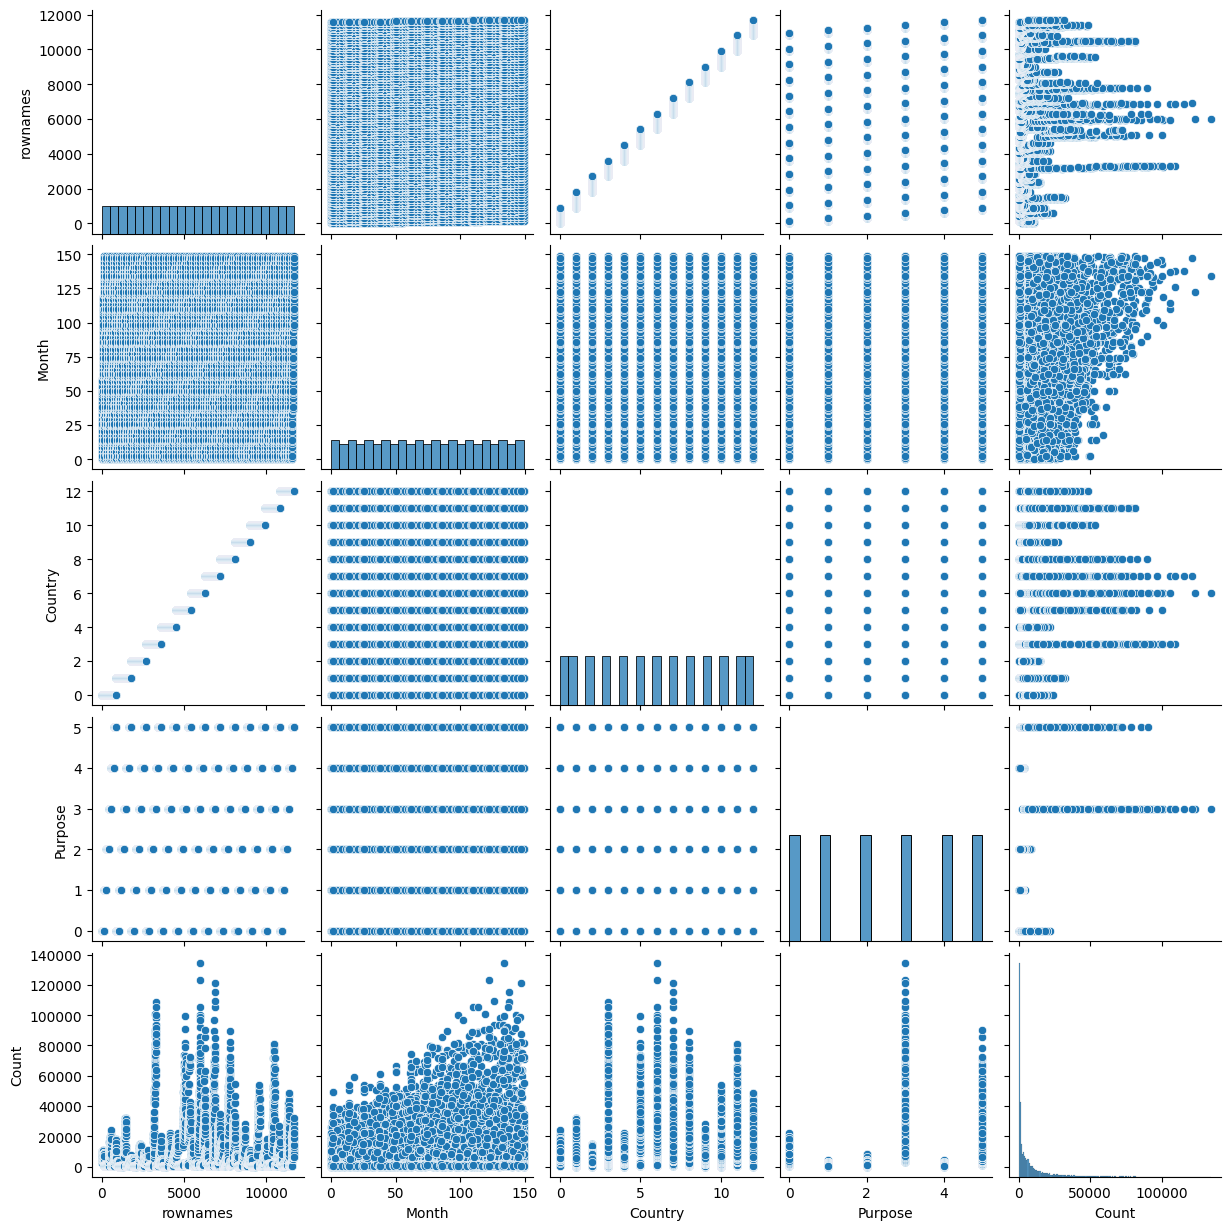

In [25]:
sns.pairplot(data=a)

In [26]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  Month  Country  Purpose
0             0      4        0        0
1             1      3        0        0
2             2      7        0        0
3             3      0        0        0
4             4      8        0        0
...         ...    ...      ...      ...
11695     11695    145       12        5
11696     11696    148       12        5
11697     11697    144       12        5
11698     11698    149       12        5
11699     11699    147       12        5

[11700 rows x 4 columns]


In [ ]:
print(y)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
print(x_train)

       rownames  Month  Country  Purpose
8791       8791     85        9        4
11257     11257      1       12        3
6343       6343     37        7        0
2394       2394    146        2        3
5159       5159     50        5        4
...         ...    ...      ...      ...
8389       8389    133        9        1
10444     10444     93       11        3
7171       7171    123        7        5
3767       3767     18        4        1
6580       6580    129        7        1

[9360 rows x 4 columns]


In [30]:
print(y_train)

8791       298
11257    21017
6343      6909
2394      9715
5159      1194
         ...  
8389       339
10444    40908
7171      5256
3767       143
6580      1540
Name: Count, Length: 9360, dtype: int64


In [31]:
print(x_test)

       rownames  Month  Country  Purpose
1874       1874     79        2        0
10989     10989     36       12        1
1485       1485    132        1        3
8571       8571     22        9        3
7107       7107     58        7        5
...         ...    ...      ...      ...
7883       7883     74        8        4
1623       1623    120        1        4
1420       1420     69        1        3
8947       8947     99        9        5
79           79     73        0        0

[2340 rows x 4 columns]


In [32]:
print(y_test)

1874      5275
10989      739
1485     22378
8571      5846
7107      6944
         ...  
7883      2336
1623       347
1420     20932
8947      4877
79        6430
Name: Count, Length: 2340, dtype: int64


In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [34]:
print(ypred)

[ 2503.37461833  6778.56788811 10663.21472052 ...  7325.13008889
 13605.97395169  3804.69410985]


In [35]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [36]:
print(ypred)

[ 3399.   145. 24358. ... 28872.  5789.  4512.]


In [37]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[ 3767.07   224.82 25825.   ... 26634.33  6118.83  5366.87]
